# Análise de série histórica de chuvas em Vitória-ES

## Importação de bibliotecas

In [58]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Verificação dos arquivos na pasta e inclusão dos CSVs em uma lista
 
arquivos_csv = [
    os.path.join('dados', arquivo)
    for arquivo in os.listdir('dados')
    if arquivo.lower().endswith('.csv')
]

arquivos_csv

['dados\\2011.CSV',
 'dados\\2012.CSV',
 'dados\\2013.CSV',
 'dados\\2014.CSV',
 'dados\\2015.CSV',
 'dados\\2016.CSV',
 'dados\\2017.CSV',
 'dados\\2018.CSV',
 'dados\\2019.CSV',
 'dados\\2020.CSV',
 'dados\\2021.CSV',
 'dados\\2022.CSV',
 'dados\\2023.CSV',
 'dados\\2024.CSV',
 'dados\\2025 1.CSV',
 'dados\\2025 2.CSV']

## Verificação do nome das colunas em cada arquivo

In [60]:
def ler_colunas_csv(caminho):
    return pd.read_csv(
        caminho,
        nrows=0,
        encoding="latin1",
        sep=";",
        skipinitialspace=True
    ).columns.tolist()


In [61]:
estrutura_arquivos = []

for caminho in arquivos_csv:
    colunas = ler_colunas_csv(caminho)
    
    estrutura_arquivos.append({
        "arquivo": os.path.basename(caminho),
        "colunas": colunas
    })


In [62]:
estrutura_arquivos[0]

{'arquivo': '2011.CSV',
 'colunas': ['DATA (YYYY-MM-DD)',
  'HORA (UTC)',
  'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
  'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
  'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
  'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
  'RADIACAO GLOBAL (KJ/m²)',
  'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
  'TEMPERATURA DO PONTO DE ORVALHO (°C)',
  'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
  'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
  'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
  'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
  'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
  'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
  'UMIDADE RELATIVA DO AR, HORARIA (%)',
  'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
  'VENTO, RAJADA MAXIMA (m/s)',
  'VENTO, VELOCIDADE HORARIA (m/s)']}

In [63]:
# Contando a quantidade de colunas

len(estrutura_arquivos[0]['colunas'])

19

In [64]:
lista_dfs = []

for arquivo in arquivos_csv:
    df = pd.read_csv(
        arquivo,
        sep=";",        
        encoding="latin1"
    )
    
    df["arquivo_origem"] = os.path.basename(arquivo)
    lista_dfs.append(df)

dados = pd.concat(lista_dfs, ignore_index=True)

dados.head()


,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",arquivo_origem,Data,Hora UTC,RADIACAO GLOBAL (Kj/m²)
0,01/01/2011,00:00,0,"1011,7","1011,7",1011,-9999,"22,4","21,5","22,9",...,94.0,94.0,94.0,132.0,"2,5","0,7",2011.CSV,NaN,NaN,NaN
1,01/01/2011,01:00,0,"1011,8","1011,8","1011,7",-9999,"22,4","21,5","22,5",...,94.0,94.0,94.0,300.0,2,"0,7",2011.CSV,NaN,NaN,NaN
2,01/01/2011,02:00,"0,2","1011,5","1011,8","1011,5",-9999,"22,4","21,4","22,4",...,94.0,94.0,94.0,59.0,"2,9","1,2",2011.CSV,NaN,NaN,NaN
3,01/01/2011,03:00,0,"1010,8","1011,5","1010,8",-9999,"22,4","21,4","22,5",...,94.0,94.0,94.0,143.0,"2,9","0,2",2011.CSV,NaN,NaN,NaN
4,01/01/2011,04:00,0,"1010,2","1010,8","1010,2",-9999,"22,6","21,5","22,7",...,94.0,94.0,94.0,203.0,"2,4","0,2",2011.CSV,NaN,NaN,NaN


In [65]:
df_colunas = pd.DataFrame(estrutura_arquivos)
df_colunas


,arquivo,colunas
0,2011.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
1,2012.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
2,2013.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
3,2014.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
4,2015.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
5,2016.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
6,2017.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
7,2018.CSV,"[DATA (YYYY-MM-DD), HORA (UTC), PRECIPITAÇÃO T..."
8,2019.CSV,"[Data, Hora UTC, PRECIPITAÇÃO TOTAL, HORÁRIO (..."
9,2020.CSV,"[Data, Hora UTC, PRECIPITAÇÃO TOTAL, HORÁRIO (..."


In [66]:
# ARRUMAR AQUI

df_colunas["colunas_lista"] = df_colunas["colunas"].str.split(";")
df_colunas['colunas'][0]

['DATA (YYYY-MM-DD)',
 'HORA (UTC)',
 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
 'RADIACAO GLOBAL (KJ/m²)',
 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
 'TEMPERATURA DO PONTO DE ORVALHO (°C)',
 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
 'VENTO, RAJADA MAXIMA (m/s)',
 'VENTO, VELOCIDADE HORARIA (m/s)']

In [67]:
df_colunas["colunas_lista"] = df_colunas["colunas"].str.split(";")
df_colunas = df_colunas.drop("colunas_lista", axis=1)
df_colunas = df_colunas["colunas"].apply(pd.Series)
df_colunas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
1,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
2,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
3,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
4,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
5,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO 

## Unificação dos dados em um único DataFrame

In [106]:
# O arquivo base é o registro do primeiro ano de medições disponível. Os demais serão adicionaos a ele.
df_base = pd.read_csv(
    arquivos_csv[0],
    encoding="latin1",
    sep=";",
    skipinitialspace=True
)
df_base.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2011,00:00,0,"1011,7","1011,7",1011,-9999,"22,4","21,5","22,9","22,4","21,9","21,4",94,94,94,132,"2,5","0,7"
1,01/01/2011,01:00,0,"1011,8","1011,8","1011,7",-9999,"22,4","21,5","22,5","22,4","21,5","21,4",94,94,94,300,2,"0,7"
2,01/01/2011,02:00,"0,2","1011,5","1011,8","1011,5",-9999,"22,4","21,4","22,4","22,3","21,5","21,3",94,94,94,59,"2,9","1,2"
3,01/01/2011,03:00,0,"1010,8","1011,5","1010,8",-9999,"22,4","21,4","22,5","22,3","21,5","21,3",94,94,94,143,"2,9","0,2"
4,01/01/2011,04:00,0,"1010,2","1010,8","1010,2",-9999,"22,6","21,5","22,7","22,4","21,7","21,3",94,94,94,203,"2,4","0,2"


In [107]:
colunas_base = df_base.columns.tolist()


In [108]:
dfs = [df_base]

for caminho in arquivos_csv[1:]:
    df_temp = pd.read_csv(
        caminho,
        encoding="latin1",
        sep=";",
        skipinitialspace=True,
        header=None,        # não existe cabeçalho
        skiprows=1          # pula a linha de nomes
    )
    
    df_temp.columns = colunas_base  # força o schema
    
    dfs.append(df_temp)


In [110]:
df_final = pd.concat(dfs, ignore_index=True)
df_final.head()


,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2011,00:00,0,"1011,7","1011,7",1011,-9999,"22,4","21,5","22,9","22,4","21,9","21,4",94.0,94.0,94.0,132.0,"2,5","0,7"
1,01/01/2011,01:00,0,"1011,8","1011,8","1011,7",-9999,"22,4","21,5","22,5","22,4","21,5","21,4",94.0,94.0,94.0,300.0,2,"0,7"
2,01/01/2011,02:00,"0,2","1011,5","1011,8","1011,5",-9999,"22,4","21,4","22,4","22,3","21,5","21,3",94.0,94.0,94.0,59.0,"2,9","1,2"
3,01/01/2011,03:00,0,"1010,8","1011,5","1010,8",-9999,"22,4","21,4","22,5","22,3","21,5","21,3",94.0,94.0,94.0,143.0,"2,9","0,2"
4,01/01/2011,04:00,0,"1010,2","1010,8","1010,2",-9999,"22,6","21,5","22,7","22,4","21,7","21,3",94.0,94.0,94.0,203.0,"2,4","0,2"


In [113]:
df_iloc = df_final.iloc[:, [0,1,2,6,16,18]].copy()
df_iloc.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",RADIACAO GLOBAL (KJ/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2011,00:00,0,-9999,132.0,"0,7"
1,01/01/2011,01:00,0,-9999,300.0,"0,7"
2,01/01/2011,02:00,"0,2",-9999,59.0,"1,2"
3,01/01/2011,03:00,0,-9999,143.0,"0,2"
4,01/01/2011,04:00,0,-9999,203.0,"0,2"


In [115]:
df_base_renomeado = df_iloc.rename(columns={
    'DATA (YYYY-MM-DD)': 'Data', 
    'HORA (UTC)': 'Hora',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Precipitacao_mm',
    'RADIACAO GLOBAL (KJ/m²)': 'Radiacao_Global_KJ_m2',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Vento_Direcao_Gr',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Vento_Velocidade_m_s'
    })

df_base_renomeado.tail()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s
139507,31/12/2025,1900 UTC,0,"1435,5",50.0,"3,9"
139508,31/12/2025,2000 UTC,0,"985,4",29.0,"2,6"
139509,31/12/2025,2100 UTC,0,"199,9",26.0,"2,1"
139510,31/12/2025,2200 UTC,0,"6,7",16.0,"2,3"
139511,31/12/2025,2300 UTC,0,NaN,15.0,"1,7"


## Tratando os dados de horas

In [117]:
df_base_renomeado['Hora'] = (
    df_base_renomeado['Hora']
    .astype(str)
    .str.upper()
    .str.replace('UTC', '', regex=False)
    .str.strip()
)

df_base_renomeado.head()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s
0,01/01/2011,00:00,0,-9999,132.0,"0,7"
1,01/01/2011,01:00,0,-9999,300.0,"0,7"
2,01/01/2011,02:00,"0,2",-9999,59.0,"1,2"
3,01/01/2011,03:00,0,-9999,143.0,"0,2"
4,01/01/2011,04:00,0,-9999,203.0,"0,2"


In [120]:
df_base_renomeado['Hora'] = (
    df_base_renomeado['Hora']
    .str.replace(
        r"^(\d{1,2}):?(\d{2})$",
        r"\1:\2",
        regex=True
    )
)
df_base_renomeado.tail()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s
139507,31/12/2025,19:00,0,"1435,5",50.0,"3,9"
139508,31/12/2025,20:00,0,"985,4",29.0,"2,6"
139509,31/12/2025,21:00,0,"199,9",26.0,"2,1"
139510,31/12/2025,22:00,0,"6,7",16.0,"2,3"
139511,31/12/2025,23:00,0,NaN,15.0,"1,7"


In [121]:
df_base_renomeado['Hora'] = pd.to_datetime(
    df_base_renomeado['Hora'],
    format="%H:%M",
    errors="coerce"
).dt.time
df_base_renomeado.head()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s
0,01/01/2011,00:00:00,0,-9999,132.0,"0,7"
1,01/01/2011,01:00:00,0,-9999,300.0,"0,7"
2,01/01/2011,02:00:00,"0,2",-9999,59.0,"1,2"
3,01/01/2011,03:00:00,0,-9999,143.0,"0,2"
4,01/01/2011,04:00:00,0,-9999,203.0,"0,2"


In [122]:
df_base_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139512 entries, 0 to 139511
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Data                   139512 non-null  object 
 1   Hora                   139512 non-null  object 
 2   Precipitacao_mm        130788 non-null  object 
 3   Radiacao_Global_KJ_m2  107791 non-null  object 
 4   Vento_Direcao_Gr       130849 non-null  float64
 5   Vento_Velocidade_m_s   130856 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.4+ MB


In [125]:
df_meteorologia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139512 entries, 2011-01-01 00:00:00 to 2025-12-31 23:00:00
Data columns (total 6 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   DATA (YYYY-MM-DD)                     139512 non-null  datetime64[ns]
 1   HORA (UTC)                            139512 non-null  object        
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)      129843 non-null  float64       
 3   RADIACAO GLOBAL (KJ/m²)               76485 non-null   float64       
 4   VENTO, DIREÇÃO HORARIA (gr) (° (gr))  129897 non-null  float64       
 5   VENTO, VELOCIDADE HORARIA (m/s)       129905 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.5+ MB


In [ ]:
df_base_renomeado["HORA (UTC)"].map(type).value_counts()


HORA (UTC)
<class 'datetime.time'>    139512
Name: count, dtype: int64

## Tratando valores "-9999"

In [143]:
colunas_float = df_base_renomeado.select_dtypes(include="number").columns


In [144]:
(df_base_renomeado[colunas_float] == -9999).sum()


Precipitacao_mm            945
Radiacao_Global_KJ_m2    31306
Vento_Direcao_Gr             0
Vento_Velocidade_m_s       951
Direcao_Vento_gr             0
dtype: int64

In [145]:
df_base_renomeado[colunas_float] = df_base_renomeado[
    colunas_float].replace(
    -9999, np.nan
)

In [133]:
# Conversão da coluna de data para o tipo "yyyy:mm:dd"

df_base_renomeado['Data'] = pd.to_datetime(
    df_base_renomeado['Data'],
    errors="coerce",
    dayfirst=True
)


In [134]:
# Conversão da coluna de precipitação para o tipo numérico

df_base_renomeado['Precipitacao_mm'] = (
    df_base_renomeado['Precipitacao_mm']
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df_base_renomeado['Precipitacao_mm'] = pd.to_numeric(
    df_base_renomeado['Precipitacao_mm'],
    errors="coerce"
)


In [141]:
# Conversão da coluna de radiação global para o tipo numérico

df_base_renomeado['Radiacao_Global_KJ_m2'] = (
    df_base_renomeado['Radiacao_Global_KJ_m2']
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df_base_renomeado['Radiacao_Global_KJ_m2'] = pd.to_numeric(
    df_base_renomeado['Radiacao_Global_KJ_m2'],
    errors="coerce"
)


In [136]:
# Conversão da coluna de direção do vento para o tipo numérico

df_base_renomeado['Direcao_Vento_gr'] = pd.to_numeric(
    df_base_renomeado['Vento_Direcao_Gr'],
    errors="coerce"
)

In [137]:
# Conversão da coluna de velocidade do vento para o tipo numérico

df_base_renomeado['Vento_Velocidade_m_s'] = (
    df_base_renomeado['Vento_Velocidade_m_s']
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df_base_renomeado['Vento_Velocidade_m_s'] = pd.to_numeric(
    df_base_renomeado['Vento_Velocidade_m_s'],
    errors="coerce"
)


In [148]:
df_base_renomeado['Precipitacao_mm'].describe()

count    129843.000000
mean          0.168397
std           1.234115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.200000
Name: Precipitacao_mm, dtype: float64

In [147]:
df_base_renomeado.iloc[:,2:].describe()

,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s,Direcao_Vento_gr
count,129843.000000,76485.000000,129897.000000,129905.000000,129897.000000
mean,0.168397,1237.685891,191.396052,1.638413,191.396052
std,1.234115,1132.258072,121.387418,0.994764,121.387418
min,0.000000,0.000000,1.000000,0.100000,1.000000
25%,0.000000,165.700000,63.000000,0.800000,63.000000
50%,0.000000,961.300000,194.000000,1.400000,194.000000
75%,0.000000,2123.300000,313.000000,2.300000,313.000000
max,52.200000,4193.500000,360.000000,6.700000,360.000000


In [146]:
df_base_renomeado.head()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s,Direcao_Vento_gr
0,2011-01-01,00:00:00,0.0,NaN,132.0,0.7,132.0
1,2011-01-01,01:00:00,0.0,NaN,300.0,0.7,300.0
2,2011-01-01,02:00:00,0.2,NaN,59.0,1.2,59.0
3,2011-01-01,03:00:00,0.0,NaN,143.0,0.2,143.0
4,2011-01-01,04:00:00,0.0,NaN,203.0,0.2,203.0


## Combinando data e hora

In [149]:
# 1. Combinar Data e Hora em uma única coluna de Timestamp
df_base_renomeado['timestamp'] = pd.to_datetime(
    df_base_renomeado['Data'].
    astype(str) + " " + df_base_renomeado['Hora'].
    astype(str),
    errors='coerce'
)


# 2. Definir o timestamp como índice e ordenar
df_base_renomeado = (
    df_base_renomeado
    .set_index('timestamp')
    .sort_index()
)


In [150]:
df_base_renomeado.head()

,Data,Hora,Precipitacao_mm,Radiacao_Global_KJ_m2,Vento_Direcao_Gr,Vento_Velocidade_m_s,Direcao_Vento_gr
timestamp,,,,,,,
2011-01-01 00:00:00,2011-01-01,00:00:00,0.0,NaN,132.0,0.7,132.0
2011-01-01 01:00:00,2011-01-01,01:00:00,0.0,NaN,300.0,0.7,300.0
2011-01-01 02:00:00,2011-01-01,02:00:00,0.2,NaN,59.0,1.2,59.0
2011-01-01 03:00:00,2011-01-01,03:00:00,0.0,NaN,143.0,0.2,143.0
2011-01-01 04:00:00,2011-01-01,04:00:00,0.0,NaN,203.0,0.2,203.0


In [173]:
df_meteorologia =df_base_renomeado

## Criando o Gráfico de Série Temporal

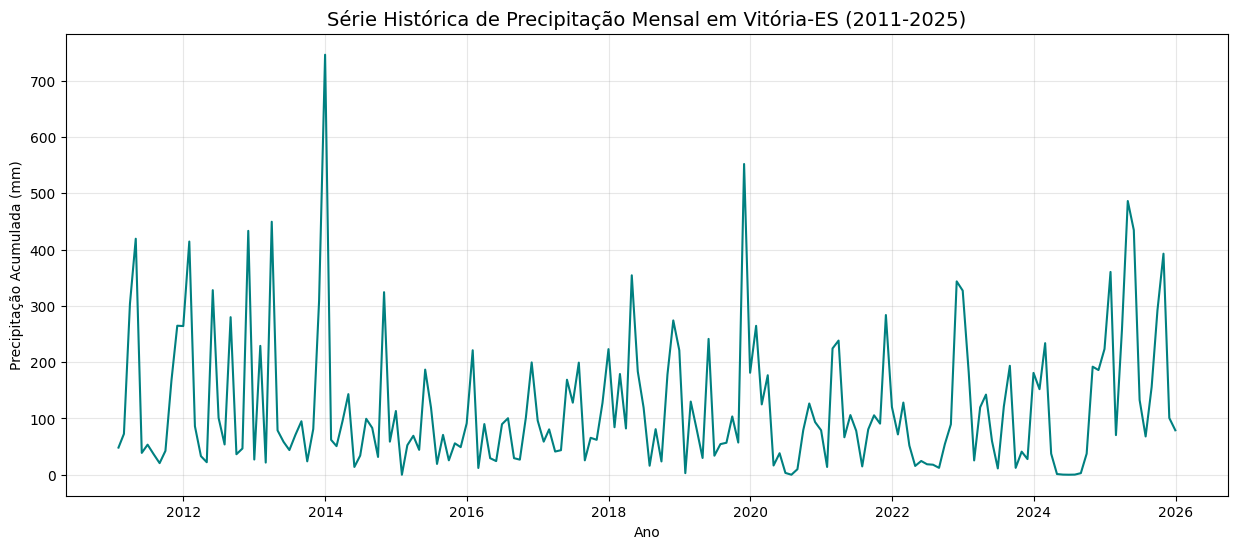

In [174]:
# Resample para somar a chuva por mês ('ME' = Month End)
chuva_mensal = df_meteorologia['Precipitacao_mm'].resample('ME').sum()

plt.figure(figsize=(15, 6))
plt.plot(chuva_mensal.index, chuva_mensal.values, color='teal', linewidth=1.5)
plt.title('Série Histórica de Precipitação Mensal em Vitória-ES (2011-2025)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Precipitação Acumulada (mm)')
plt.grid(True, alpha=0.3)
plt.show()

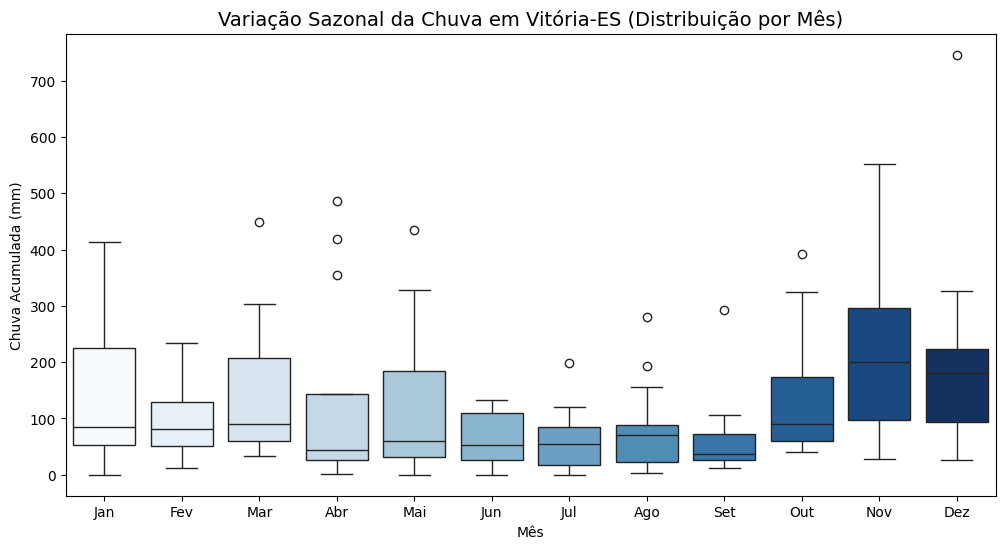

In [175]:
# Extrair mês e ano para análise
df_plot = chuva_mensal.to_frame()
df_plot['mes'] = df_plot.index.month
df_plot['ano'] = df_plot.index.year

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot, x='mes', y='Precipitacao_mm', hue='mes', palette='Blues', legend=False)
plt.title('Variação Sazonal da Chuva em Vitória-ES (Distribuição por Mês)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Chuva Acumulada (mm)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

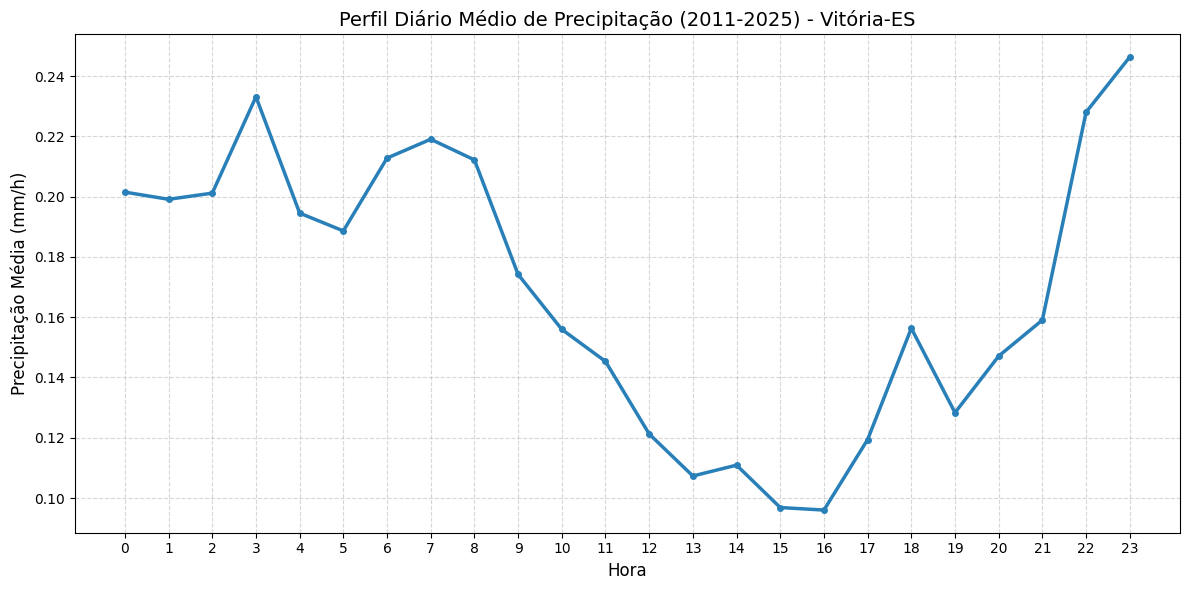

In [176]:
# 1. Agrupar pela hora do dia e calcular a média da precipitação
# Extraímos a hora (0-23) da coluna 'HORA (UTC)' que você já tratou
perfil_diario_chuva = df_meteorologia.groupby(
    df_meteorologia['Hora'].apply(lambda x: x.hour)
)['Precipitacao_mm'].mean()

# 2. Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(perfil_diario_chuva.index, perfil_diario_chuva.values, 
         color='#2980b9', linewidth=2.5, marker='o', markersize=4)

# 3. Customização Técnica e Contextual para Vitória-ES
plt.title('Perfil Diário Médio de Precipitação (2011-2025) - Vitória-ES', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Precipitação Média (mm/h)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

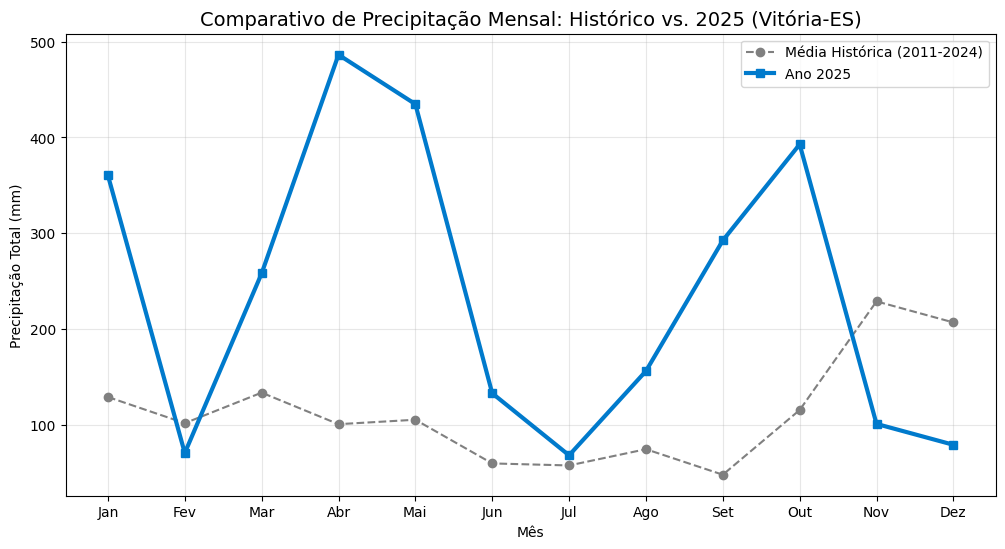

In [177]:
# 1. Preparação: Garantir que temos colunas de Ano e Mês
# O notebook já converteu a coluna para datetime
df_meteorologia['Ano'] = df_meteorologia['Data'].dt.year
df_meteorologia['Mes'] = df_meteorologia['Data'].dt.month

# 2. Calcular o total de chuva por mês para cada ano individualmente
# Isso é necessário para que a média histórica seja baseada em "chuva total mensal"
chuva_mensal_por_ano = df_meteorologia.groupby(['Ano', 'Mes'])['Precipitacao_mm'].sum().reset_index()

# 3. Separar o período histórico (2011-2024) e o ano atual (2025)
historico = chuva_mensal_por_ano[chuva_mensal_por_ano['Ano'] < 2025]
dados_2025 = chuva_mensal_por_ano[chuva_mensal_por_ano['Ano'] == 2025]

# 4. Calcular a média dos totais mensais para o histórico
# Ex: Média de todos os janeiros, todos os fevereiros, etc.
media_historica = historico.groupby('Mes')['Precipitacao_mm'].mean()

# 5. Preparar os dados de 2025 (ajustando o índice para os meses)
serie_2025 = dados_2025.set_index('Mes')['Precipitacao_mm']

# 6. Criação do Gráfico
plt.figure(figsize=(12, 6))

# Linha da Média Histórica
plt.plot(media_historica.index, media_historica.values, 
         label='Média Histórica (2011-2024)', color='gray', linestyle='--', marker='o')

# Linha de 2025
plt.plot(serie_2025.index, serie_2025.values, 
         label='Ano 2025', color='#007acc', linewidth=3, marker='s')

# Formatação
plt.title('Comparativo de Precipitação Mensal: Histórico vs. 2025 (Vitória-ES)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Precipitação Total (mm)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

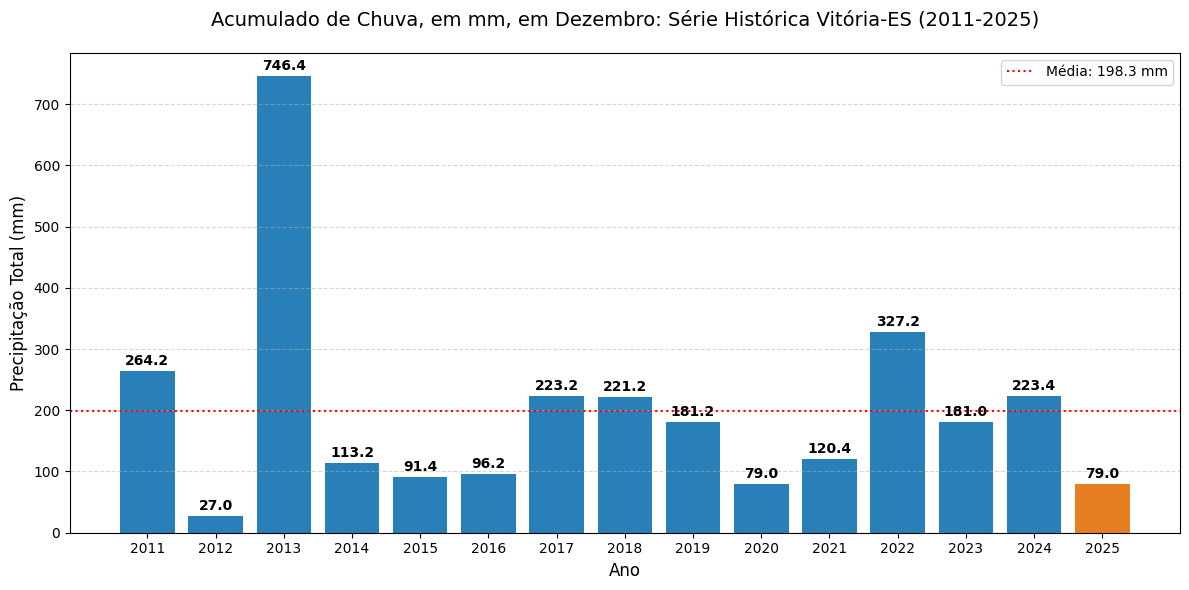

In [178]:
# 1. Preparação: Garantir que temos as colunas de Ano e Mês
# Extraídas da coluna tratada no notebook
df_meteorologia['Ano'] = df_meteorologia['Data'].dt.year
df_meteorologia['Mes'] = df_meteorologia['Data'].dt.month

# 2. Filtrar apenas os dados de Dezembro (Mês 12)
dados_dezembro = df_meteorologia[df_meteorologia['Mes'] == 12]
# 3. Calcular o acumulado de chuva em dezembro para cada ano
chuva_dezembro_por_ano = dados_dezembro.groupby('Ano')['Precipitacao_mm'].sum()

# 4. Configurar as cores (Destacando 2025 se ele já possuir dados)
cores = ['#2980b9' if ano < 2025 else '#e67e22' for ano in chuva_dezembro_por_ano.index]

# 5. Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(chuva_dezembro_por_ano.index, chuva_dezembro_por_ano.values, color=cores)

# 6. Adicionar rótulos de dados (Data Labels)
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 5, 
             f'{yval:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customização para Gestão Ambiental
plt.title('Acumulado de Chuva, em mm, em Dezembro: Série Histórica Vitória-ES (2011-2025)', fontsize=14, pad=20)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.xticks(chuva_dezembro_por_ano.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Linha de média para comparação rápida
media_dezembro = chuva_dezembro_por_ano.mean()
plt.axhline(media_dezembro, color='red', linestyle=':', label=f'Média: {media_dezembro:.1f} mm')
plt.legend()

plt.tight_layout()
plt.show()

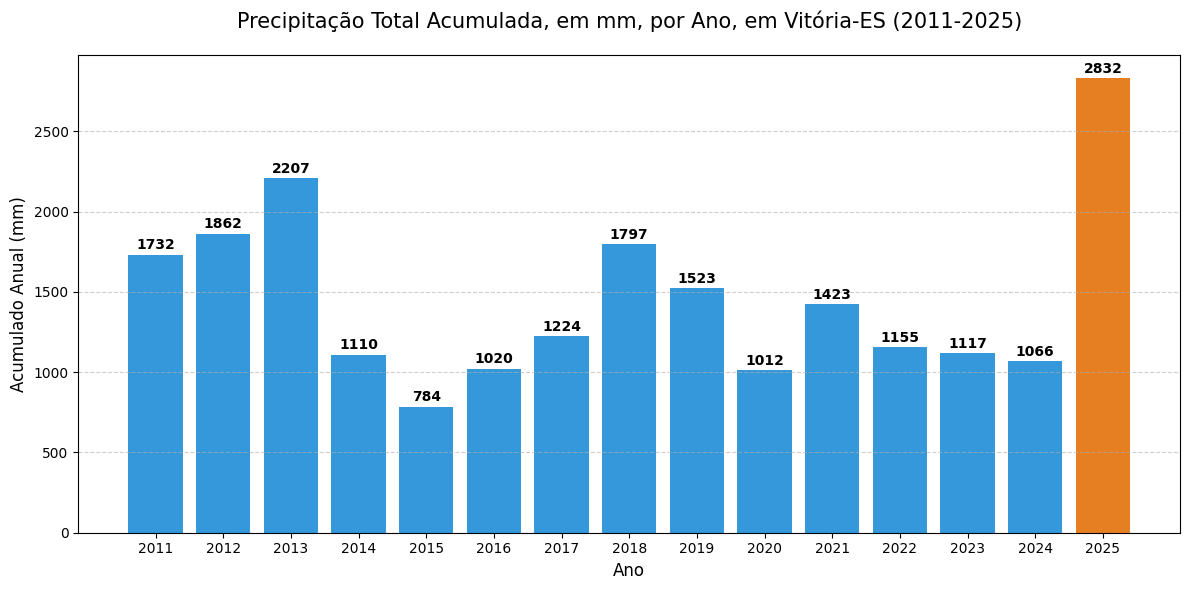

In [179]:
# 1. Agrupar os dados por ano e somar a precipitação
# Extraímos o ano diretamente da coluna de data que você formatou
acumulado_anual = df_meteorologia.groupby(df_meteorologia['Data'].dt.year)['Precipitacao_mm'].sum()

# 2. Configurar as cores: Azul para o histórico e Laranja para o ano atual (parcial)
cores = ['#3498db' if ano < 2025 else '#e67e22' for ano in acumulado_anual.index]

# 3. Criar o gráfico de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(acumulado_anual.index, acumulado_anual.values, color=cores)

# 4. Adicionar rótulos de dados (Data Labels) no topo de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 15, 
             f'{yval:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Customização Técnica
plt.title('Precipitação Total Acumulada, em mm, por Ano, em Vitória-ES (2011-2025)', fontsize=15, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Acumulado Anual (mm)', fontsize=12)
plt.xticks(acumulado_anual.index) # Garante que todos os anos apareçam no eixo X
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

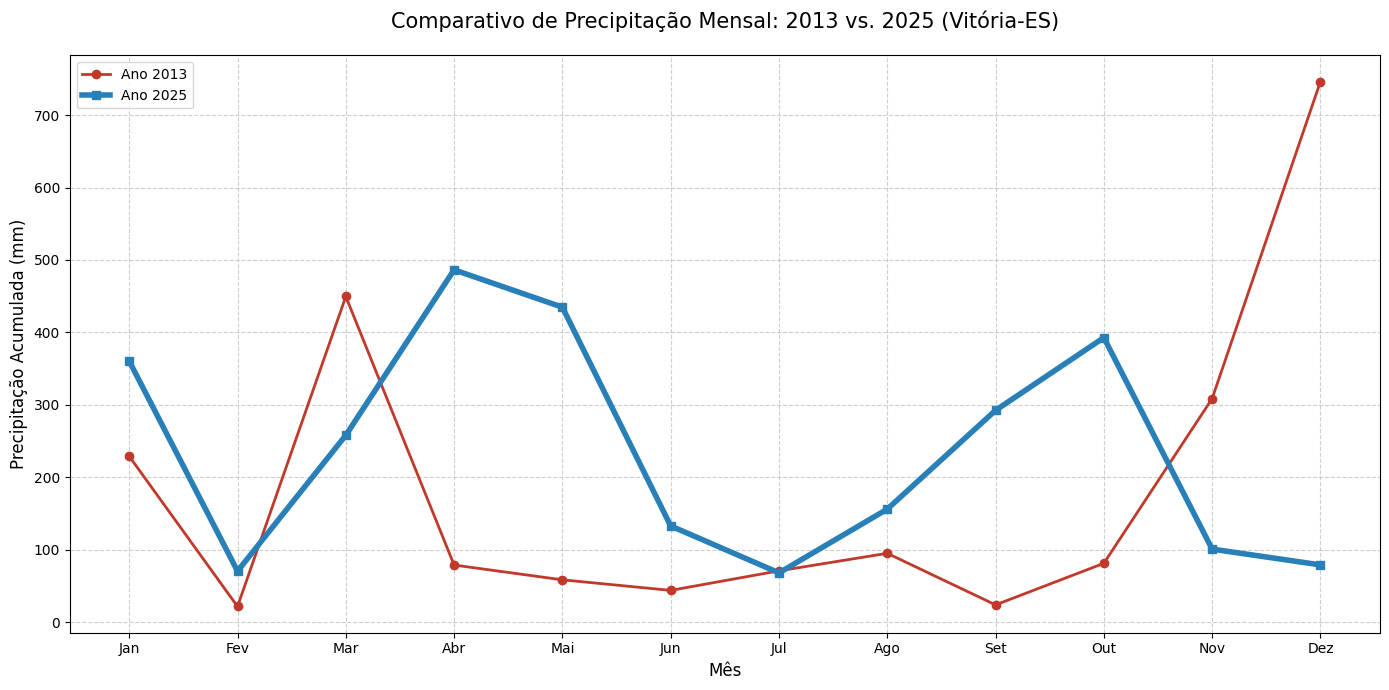

In [180]:

# 1. Preparação: Garantir que temos colunas de Ano e Mês
# Baseado na limpeza que você já fez no seu notebook
df_meteorologia['Ano'] = df_meteorologia['Data'].dt.year
df_meteorologia['Mes'] = df_meteorologia['Data'].dt.month

# 2. Agrupar para obter o acumulado mensal de cada ano
chuva_mensal_ano = df_meteorologia.groupby(['Ano', 'Mes'])['Precipitacao_mm'].sum().reset_index()
# 3. Filtrar especificamente os anos de 2013 e 2025
dados_2013 = chuva_mensal_ano[chuva_mensal_ano['Ano'] == 2013].set_index('Mes')['Precipitacao_mm']
dados_2025 = chuva_mensal_ano[chuva_mensal_ano['Ano'] == 2025].set_index('Mes')['Precipitacao_mm']

# 4. Criação do Gráfico Comparativo
plt.figure(figsize=(14, 7))

# Linha de 2013 (Ano de referência para eventos extremos)
plt.plot(dados_2013.index, dados_2013.values, 
         label='Ano 2013', color='#c0392b', linewidth=2, marker='o')

# Linha de 2025 (Ano Atual)
plt.plot(dados_2025.index, dados_2025.values, 
         label='Ano 2025', color='#2980b9', linewidth=4, marker='s')

# Customização técnica para SEMAM
plt.title('Comparativo de Precipitação Mensal: 2013 vs. 2025 (Vitória-ES)', fontsize=15, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação Acumulada (mm)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

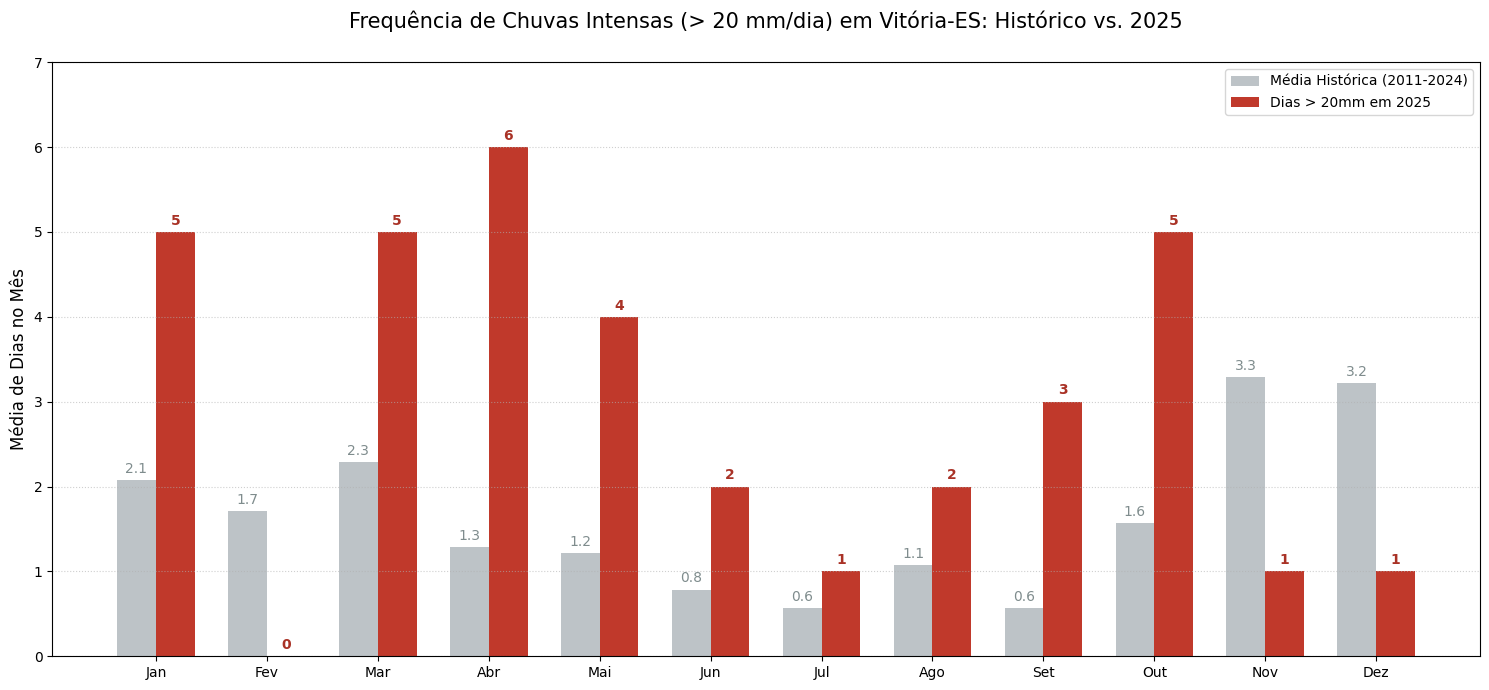

In [181]:
# 1. Agrupar os dados por dia para ter o acumulado diário total
chuva_diaria = df_meteorologia.groupby('Data')['Precipitacao_mm'].sum().reset_index()

# 2. Definir o critério de chuva superior a 20 mm
chuva_diaria['evento_pesado'] = chuva_diaria['Precipitacao_mm'] > 20

# 3. Adicionar Ano e Mês para o agrupamento
chuva_diaria['Ano'] = chuva_diaria['Data'].dt.year
chuva_diaria['Mes'] = chuva_diaria['Data'].dt.month

# 4. Contar a quantidade de eventos por mês/ano
contagem_eventos = chuva_diaria.groupby(['Ano', 'Mes'])['evento_pesado'].sum().reset_index()

# 5. Separar o Histórico (2011-2024) e 2025
hist_eventos = contagem_eventos[contagem_eventos['Ano'] < 2025]
media_hist_eventos = hist_eventos.groupby('Mes')['evento_pesado'].mean()

atual_2025_eventos = contagem_eventos[contagem_eventos['Ano'] == 2025].set_index('Mes')['evento_pesado']

# 6. Configuração do Gráfico de Barras Lado a Lado
meses = np.arange(1, 13)
largura = 0.35
plt.figure(figsize=(15, 7))

# Barras
barras_hist = plt.bar(meses - largura/2, media_hist_eventos.reindex(meses, fill_value=0), 
                      width=largura, label='Média Histórica (2011-2024)', color='#bdc3c7')

barras_2025 = plt.bar(meses + largura/2, atual_2025_eventos.reindex(meses, fill_value=0), 
                      width=largura, label='Dias > 20mm em 2025', color='#c0392b') # Vermelho para alerta

# 7. Adicionar Rótulos de Dados
# Histórico
for i, v in media_hist_eventos.reindex(meses, fill_value=0).items():
    plt.text(i - largura/2, v + 0.05, f'{v:.1f}', ha='center', va='bottom', fontsize=10, color='#7f8c8d')

# 2025
for i, v in atual_2025_eventos.reindex(meses, fill_value=0).items():
    if v >= 0:
        plt.text(i + largura/2, v + 0.05, int(v), ha='center', va='bottom', fontweight='bold', color='#a93226')

# Customização Final
plt.title('Frequência de Chuvas Intensas (> 20 mm/dia) em Vitória-ES: Histórico vs. 2025', fontsize=15, pad=25)
plt.ylabel('Média de Dias no Mês', fontsize=12)
plt.xticks(meses, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.ylim(0, max(media_hist_eventos.max(), atual_2025_eventos.max()) + 1)

plt.tight_layout()
plt.show()

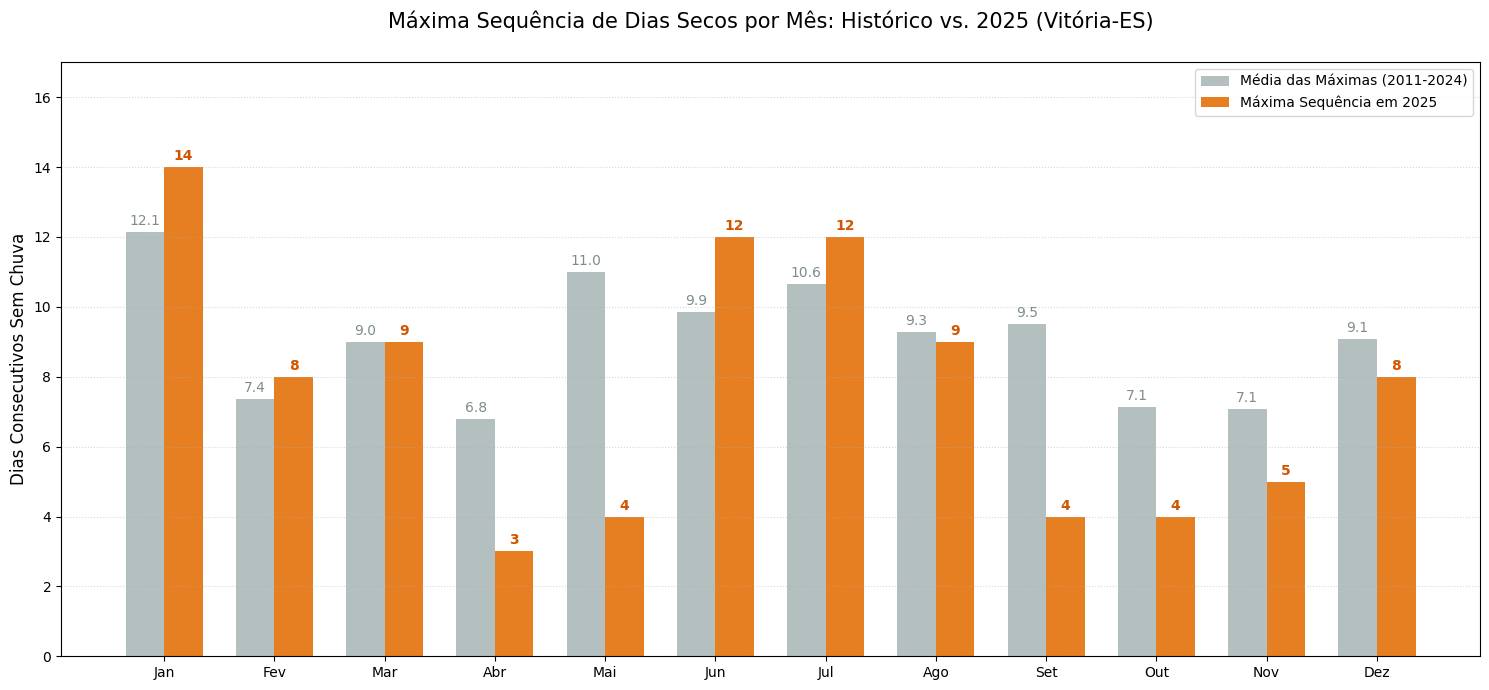

In [182]:
# 1. Consolidar a chuva por dia (soma das 24h)
chuva_diaria = df_meteorologia.groupby('Data')['Precipitacao_mm'].sum().reset_index()

# 2. Função para calcular o tamanho da maior sequência de dias secos (chuva == 0)
def max_consecutive_dry(series):
    is_dry = (series == 0)
    # Lógica de agrupamento: identifica mudanças de estado (seco/molhado)
    groups = (is_dry != is_dry.shift()).cumsum()
    # Filtra apenas os grupos onde o estado é 'seco' e retorna o tamanho do maior
    dry_streaks = is_dry[is_dry].groupby(groups).sum()
    return dry_streaks.max() if not dry_streaks.empty else 0

# 3. Preparar colunas de Ano e Mês
chuva_diaria['Ano'] = chuva_diaria['Data'].dt.year
chuva_diaria['Mes'] = chuva_diaria['Data'].dt.month

# 4. Calcular a maior sequência seca para cada mês de cada ano
sequencias = chuva_diaria.groupby(['Ano', 'Mes'])['Precipitacao_mm'].apply(max_consecutive_dry).reset_index()
sequencias.columns = ['Ano', 'Mes', 'max_dias_secos']

# 5. Separar Histórico (2011-2024) e 2025
hist_seq = sequencias[sequencias['Ano'] < 2025]
media_hist_seq = hist_seq.groupby('Mes')['max_dias_secos'].mean()
atual_2025_seq = sequencias[sequencias['Ano'] == 2025].set_index('Mes')['max_dias_secos']

# 6. Criação do Gráfico de Barras Lado a Lado
meses = np.arange(1, 13)
largura = 0.35
plt.figure(figsize=(15, 7))

# Barras
bar_hist = plt.bar(meses - largura/2, media_hist_seq.reindex(meses, fill_value=0), 
                   width=largura, label='Média das Máximas (2011-2024)', color='#95a5a6', alpha=0.7)

bar_2025 = plt.bar(meses + largura/2, atual_2025_seq.reindex(meses, fill_value=0), 
                   width=largura, label='Máxima Sequência em 2025', color='#e67e22') # Laranja para seca/calor

# 7. Adicionar Rótulos de Dados (Data Labels)
for i, v in media_hist_seq.reindex(meses, fill_value=0).items():
    plt.text(i - largura/2, v + 0.2, f'{v:.1f}', ha='center', fontsize=10, color='#7f8c8d')

for i, v in atual_2025_seq.reindex(meses, fill_value=0).items():
    if v > 0:
        plt.text(i + largura/2, v + 0.2, int(v), ha='center', fontweight='bold', fontsize=10, color='#d35400')

# Customização Final para Gestão Ambiental
plt.title('Máxima Sequência de Dias Secos por Mês: Histórico vs. 2025 (Vitória-ES)', fontsize=15, pad=25)
plt.ylabel('Dias Consecutivos Sem Chuva', fontsize=12)
plt.xticks(meses, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.ylim(0, max(media_hist_seq.max(), atual_2025_seq.max()) + 3)

plt.tight_layout()
plt.show()

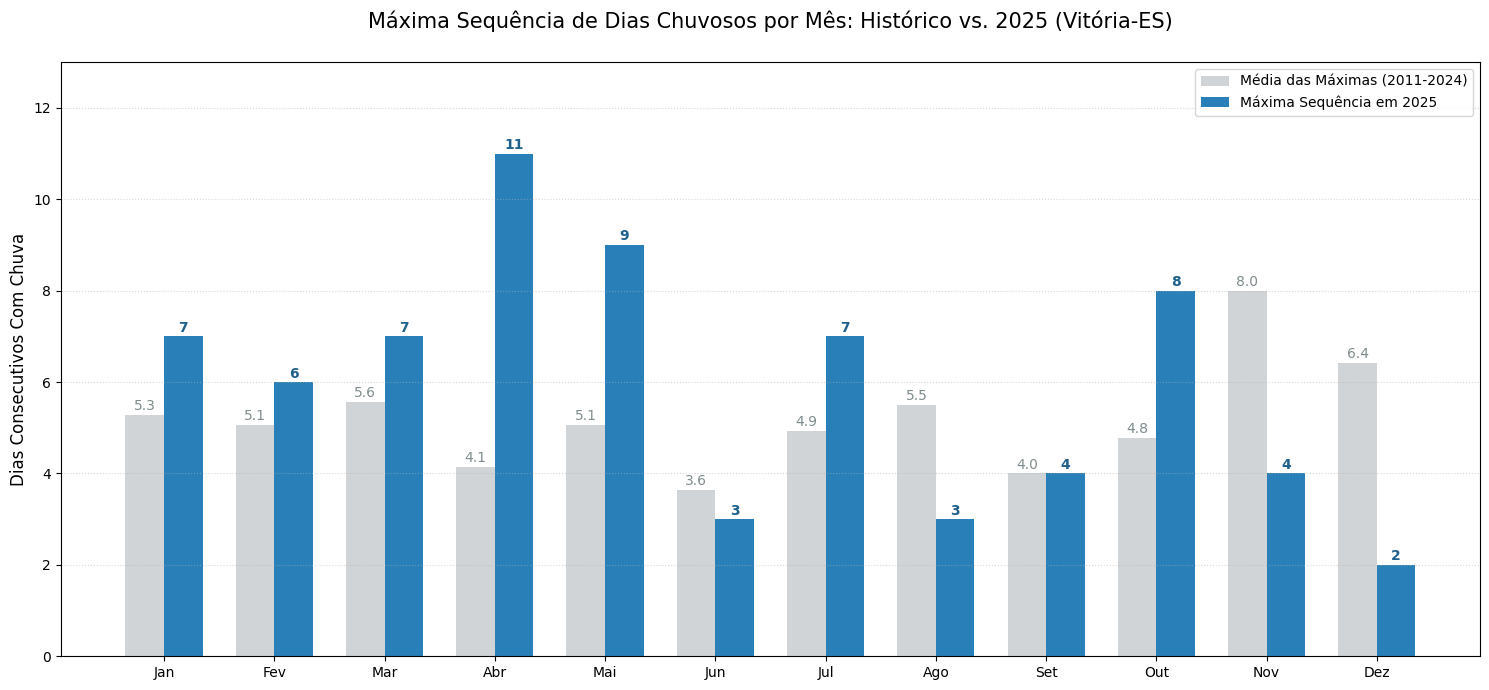

In [183]:
# 1. Consolidar a chuva por dia
chuva_diaria = df_meteorologia.groupby('Data')['Precipitacao_mm'].sum().reset_index()

# 2. Função para calcular o tamanho da maior sequência de dias chuvosos (chuva > 0)
def max_consecutive_wet(series):
    is_wet = (series > 0)
    # Identifica mudanças de estado para criar grupos de sequências
    groups = (is_wet != is_wet.shift()).cumsum()
    # Filtra apenas os grupos 'chuvosos' e conta o tamanho
    wet_streaks = is_wet[is_wet].groupby(groups).sum()
    return wet_streaks.max() if not wet_streaks.empty else 0

# 3. Preparar colunas de Ano e Mês
chuva_diaria['Ano'] = chuva_diaria['Data'].dt.year
chuva_diaria['Mes'] = chuva_diaria['Data'].dt.month

# 4. Calcular a maior sequência chuvosa para cada mês de cada ano
sequencias_wet = chuva_diaria.groupby(['Ano', 'Mes'])['Precipitacao_mm'].apply(max_consecutive_wet).reset_index()
sequencias_wet.columns = ['Ano', 'Mes', 'max_dias_chuvosos']

# 5. Separar Histórico (2011-2024) e 2025
hist_wet = sequencias_wet[sequencias_wet['Ano'] < 2025]
media_hist_wet = hist_wet.groupby('Mes')['max_dias_chuvosos'].mean()
atual_2025_wet = sequencias_wet[sequencias_wet['Ano'] == 2025].set_index('Mes')['max_dias_chuvosos']

# 6. Criação do Gráfico
meses = np.arange(1, 13)
largura = 0.35
plt.figure(figsize=(15, 7))

# Barras
bar_hist = plt.bar(meses - largura/2, media_hist_wet.reindex(meses, fill_value=0), 
                   width=largura, label='Média das Máximas (2011-2024)', color='#bdc3c7', alpha=0.7)

bar_2025 = plt.bar(meses + largura/2, atual_2025_wet.reindex(meses, fill_value=0), 
                   width=largura, label='Máxima Sequência em 2025', color='#2980b9') # Azul para chuva

# 7. Adicionar Rótulos de Dados
for i, v in media_hist_wet.reindex(meses, fill_value=0).items():
    plt.text(i - largura/2, v + 0.1, f'{v:.1f}', ha='center', fontsize=10, color='#7f8c8d')

for i, v in atual_2025_wet.reindex(meses, fill_value=0).items():
    if v >= 0:
        plt.text(i + largura/2, v + 0.1, int(v), ha='center', fontweight='bold', fontsize=10, color='#1f618d')

# Customização Final
plt.title('Máxima Sequência de Dias Chuvosos por Mês: Histórico vs. 2025 (Vitória-ES)', fontsize=15, pad=25)
plt.ylabel('Dias Consecutivos Com Chuva', fontsize=12)
plt.xticks(meses, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.ylim(0, max(media_hist_wet.max(), atual_2025_wet.max()) + 2)

plt.tight_layout()
plt.show()

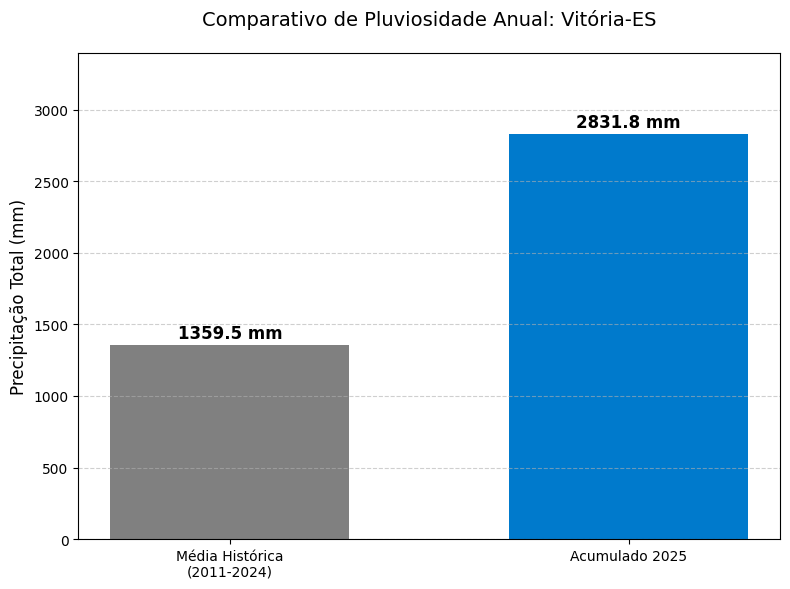

In [184]:
# 1. Agrupar os dados por ano para obter o acumulado de cada ano
# O pandas extrai o ano da coluna de data que você já tratou no notebook
acumulado_anual = df_meteorologia.groupby(df_meteorologia['Data'].dt.year)['Precipitacao_mm'].sum()

# 2. Calcular a média dos totais anuais até 2024 (Baseline)
media_anual_historica = acumulado_anual[acumulado_anual.index < 2025].mean()

# 3. Obter o valor total acumulado apenas de 2025
acumulado_2025 = acumulado_anual.get(2025, 0)

# 4. Preparar os dados para o gráfico
labels = ['Média Histórica\n(2011-2024)', 'Acumulado 2025']
valores = [media_anual_historica, acumulado_2025]
cores = ['gray', '#007acc']  # Cinza para o histórico e verde para 2025

# 5. Criar o gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(labels, valores, color=cores, width=0.6)

# Adicionar os rótulos de dados (Data Labels) no topo das barras
# Útil para suas apresentações na SEMAM
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 20, 
             f'{yval:.1f} mm', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Customização técnica
plt.title('Comparativo de Pluviosidade Anual: Vitória-ES', fontsize=14, pad=20)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar o limite do eixo Y para dar um respiro ao gráfico
plt.ylim(0, max(valores) * 1.2)

plt.tight_layout()
plt.show()

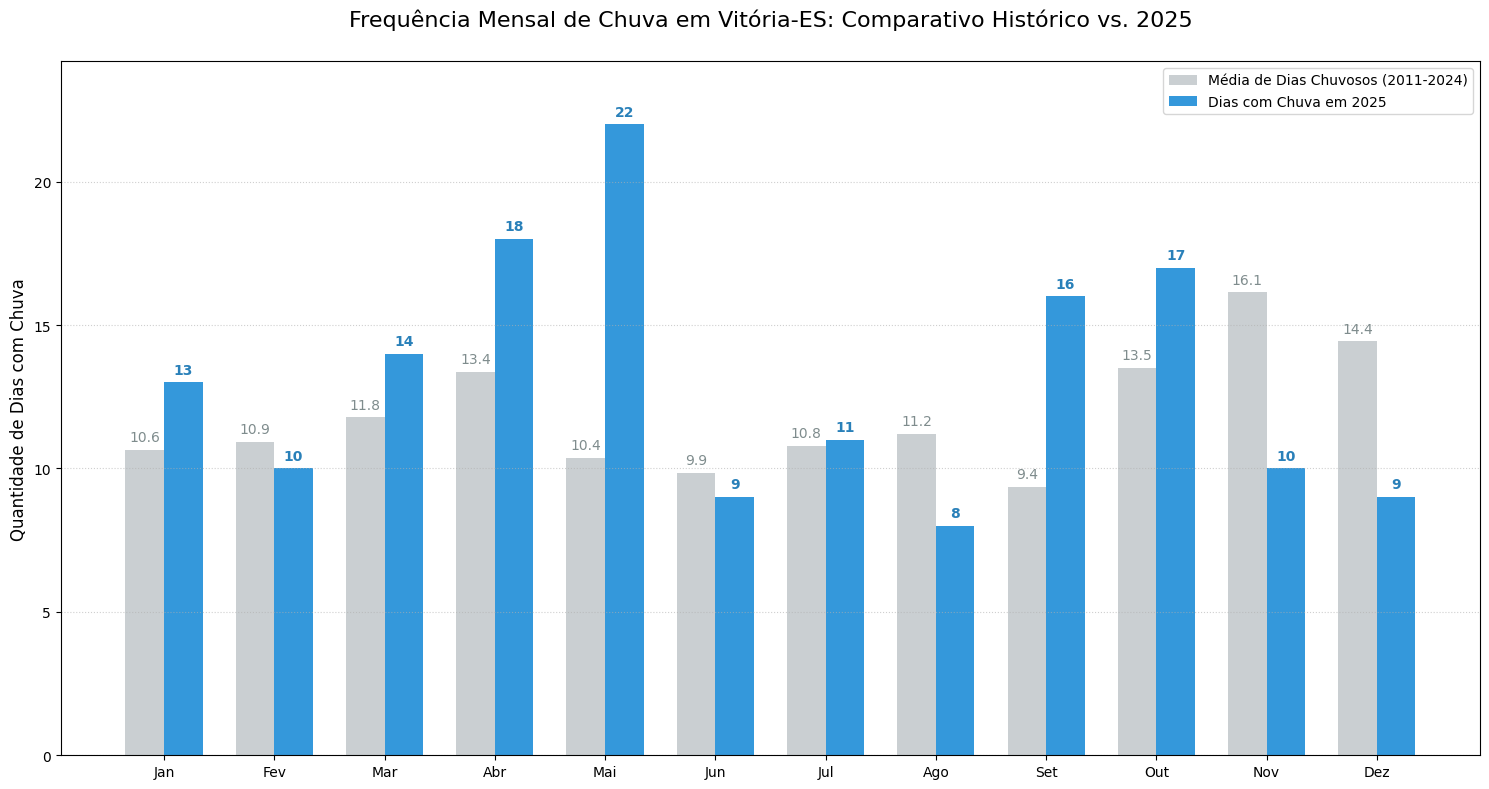

In [185]:
# 1. Agrupar os dados por dia para saber o total diário
chuva_diaria = df_meteorologia.groupby('Data')['Precipitacao_mm'].sum().reset_index()

# 2. Definir o que é um "dia com chuva" (Total > 0 mm)
chuva_diaria['dia_chuvoso'] = chuva_diaria['Precipitacao_mm'] > 0
chuva_diaria['Ano'] = chuva_diaria['Data'].dt.year
chuva_diaria['Mes'] = chuva_diaria['Data'].dt.month

# 3. Contar quantos dias chuvosos houve em cada mês de cada ano
contagem_por_mes_ano = chuva_diaria.groupby(['Ano', 'Mes'])['dia_chuvoso'].sum().reset_index()

# 4. Separar Histórico (2011-2024) e 2025
historico_dias = contagem_por_mes_ano[contagem_por_mes_ano['Ano'] < 2025]
media_dias_hist = historico_dias.groupby('Mes')['dia_chuvoso'].mean()
atual_2025_dias = contagem_por_mes_ano[contagem_por_mes_ano['Ano'] == 2025].set_index('Mes')['dia_chuvoso']

# 5. Configuração do Gráfico
meses = np.arange(1, 13)
largura = 0.35
plt.figure(figsize=(15, 8))

# Barra 1: Média Histórica
barras_hist = plt.bar(meses - largura/2, media_dias_hist.reindex(meses, fill_value=0), 
                      width=largura, label='Média de Dias Chuvosos (2011-2024)', color='#bdc3c7', alpha=0.8)

# Barra 2: Ano 2025
barras_2025 = plt.bar(meses + largura/2, atual_2025_dias.reindex(meses, fill_value=0), 
                      width=largura, label='Dias com Chuva em 2025', color='#3498db')

# --- ADIÇÃO DOS RÓTULOS DE DADOS ---

# Rótulos para a Média Histórica (Cinza)
for i, v in media_dias_hist.reindex(meses, fill_value=0).items():
    if v > 0:
        plt.text(i - largura/2, v + 0.2, f'{v:.1f}', ha='center', va='bottom', 
                 fontsize=10, color='#7f8c8d')

# Rótulos para 2025 (Azul)
for i, v in atual_2025_dias.reindex(meses, fill_value=0).items():
    if v > 0:
        plt.text(i + largura/2, v + 0.2, int(v), ha='center', va='bottom', 
                 fontweight='bold', fontsize=10, color='#2980b9')

# Customização Final
plt.title('Frequência Mensal de Chuva em Vitória-ES: Comparativo Histórico vs. 2025', fontsize=16, pad=25)
plt.ylabel('Quantidade de Dias com Chuva', fontsize=12)
plt.xticks(meses, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.ylim(0, max(media_dias_hist.max(), atual_2025_dias.max()) * 1.1)

plt.tight_layout()
plt.show()

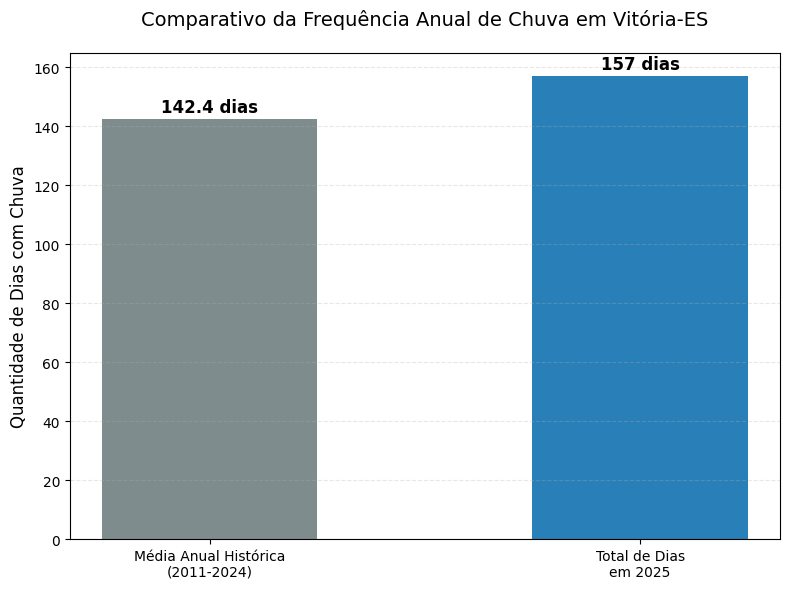

In [186]:
# 1. Agrupar por dia para identificar dias com chuva (Total diário > 0)
chuva_diaria = df_meteorologia.groupby('Data')['Precipitacao_mm'].sum().reset_index()
chuva_diaria['dia_chuvoso'] = chuva_diaria['Precipitacao_mm'] > 0
chuva_diaria['Ano'] = chuva_diaria['Data'].dt.year

# 2. Contar o total de dias chuvosos por cada ano
dias_por_ano = chuva_diaria.groupby('Ano')['dia_chuvoso'].sum()

# 3. Calcular a média histórica anual (2011-2024)
media_anual_dias_hist = dias_por_ano[dias_por_ano.index < 2025].mean()

# 4. Obter o valor específico de 2025
total_dias_2025 = dias_por_ano.get(2025, 0)

# 5. Preparar o gráfico
labels = ['Média Anual Histórica\n(2011-2024)', 'Total de Dias\nem 2025']
valores = [media_anual_dias_hist, total_dias_2025]
cores = ['#7f8c8d', '#2980b9']

plt.figure(figsize=(8, 6))
barras = plt.bar(labels, valores, color=cores, width=0.5)

# Adicionar rótulos de dados
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1, 
             f'{yval:.1f} dias' if yval == media_anual_dias_hist else f'{int(yval)} dias', 
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Customização para relatórios da Secretaria
plt.title('Comparativo da Frequência Anual de Chuva em Vitória-ES', fontsize=14, pad=20)
plt.ylabel('Quantidade de Dias com Chuva', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

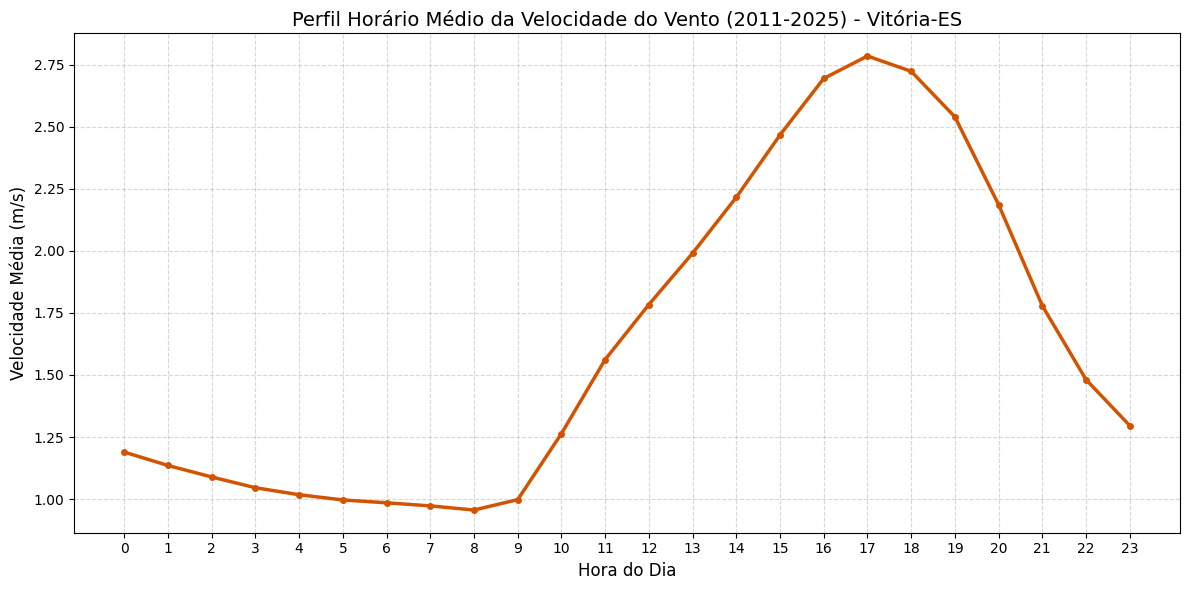

In [189]:
# 1. Agrupar pela hora do dia e calcular a média da velocidade
# Como 'HORA (UTC)' contém objetos datetime.time, extraímos apenas a hora (.hour)
perfil_diario_vento = df_meteorologia.groupby(
    df_meteorologia['Hora'].apply(lambda x: x.hour)
)['Vento_Velocidade_m_s'].mean()

# 2. Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(perfil_diario_vento.index, perfil_diario_vento.values, 
         color='#d35400', linewidth=2.5, marker='o', markersize=4)

# 3. Customização Técnica e Contextual
plt.title('Perfil Horário Médio da Velocidade do Vento (2011-2025) - Vitória-ES', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Velocidade Média (m/s)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

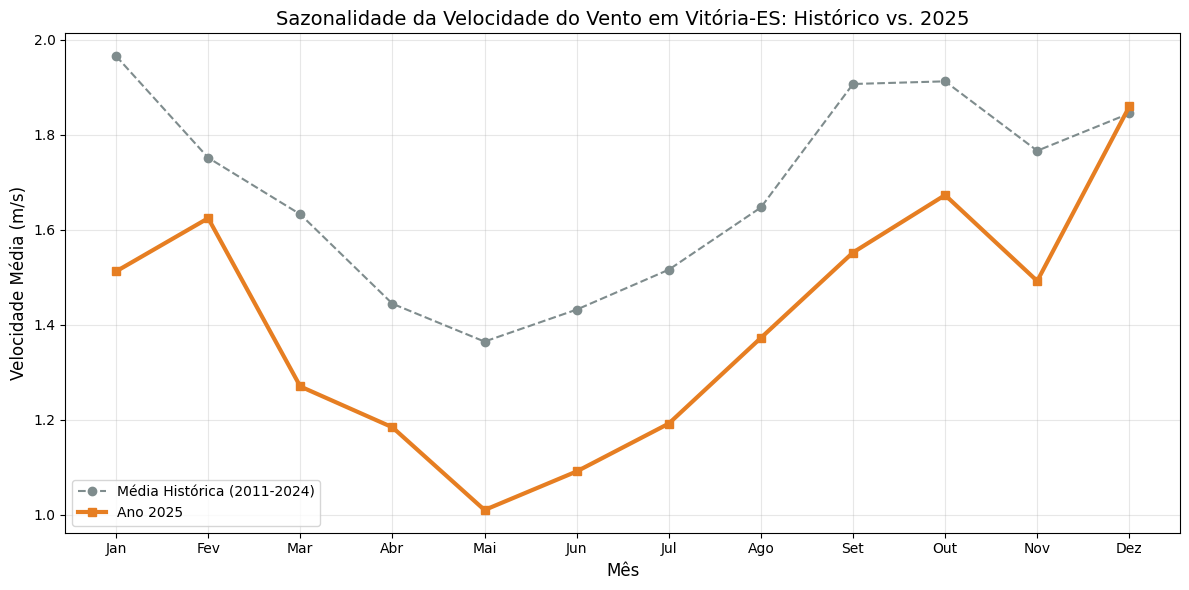

In [190]:
# 1. Preparação: Calculando a média mensal de vento por ano
# O agrupamento é feito por Ano e Mês para termos a média de cada "bloco" mensal
vento_mensal_por_ano = df_meteorologia.groupby(['Ano', 'Mes'])['Vento_Velocidade_m_s'].mean().reset_index()

# 2. Separar Período Histórico e 2025
hist_vento = vento_mensal_por_ano[vento_mensal_por_ano['Ano'] < 2025]
dados_2025_vento = vento_mensal_por_ano[vento_mensal_por_ano['Ano'] == 2025]

# 3. Calcular a Média Histórica para cada mês (Média de todos os Jan, todos os Fev...)
media_mensal_hist_vento = hist_vento.groupby('Mes')['Vento_Velocidade_m_s'].mean()

# 4. Preparar série de 2025
serie_2025_vento = dados_2025_vento.set_index('Mes')['Vento_Velocidade_m_s']

# 5. Plotagem
plt.figure(figsize=(12, 6))

# Linha do Histórico (2011-2024)
plt.plot(media_mensal_hist_vento.index, media_mensal_hist_vento.values, 
         label='Média Histórica (2011-2024)', color='#7f8c8d', linestyle='--', marker='o')

# Linha de 2025
plt.plot(serie_2025_vento.index, serie_2025_vento.values, 
         label='Ano 2025', color='#e67e22', linewidth=3, marker='s')

# Customização para Gestão Ambiental
plt.title('Sazonalidade da Velocidade do Vento em Vitória-ES: Histórico vs. 2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Velocidade Média (m/s)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

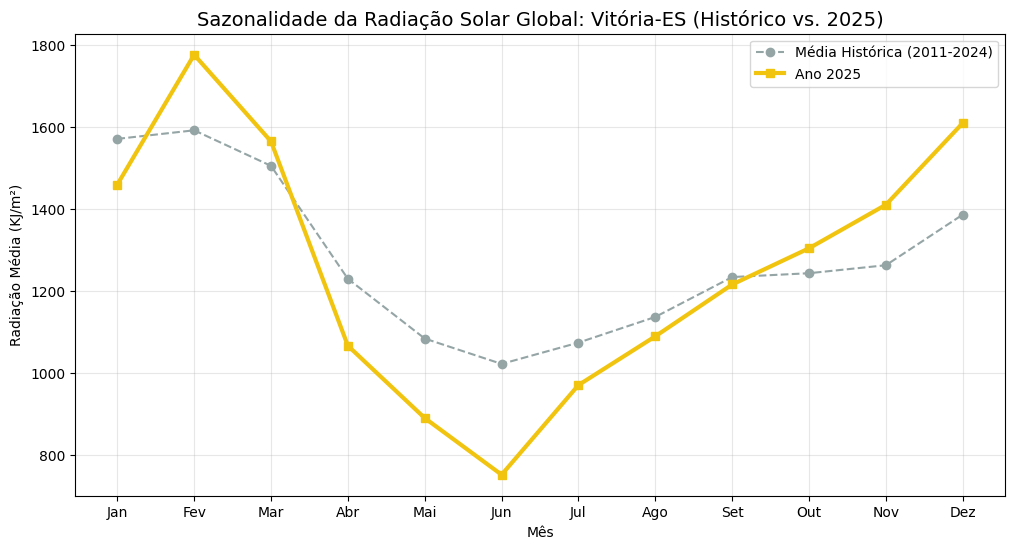

In [192]:
# 1. Agrupar para obter a radiação média de cada mês em cada ano
rad_mensal_por_ano = df_meteorologia.groupby(['Ano', 'Mes'])['Radiacao_Global_KJ_m2'].mean().reset_index()

# 2. Separar Histórico (2011-2024) e o ano de 2025
hist_rad = rad_mensal_por_ano[rad_mensal_por_ano['Ano'] < 2025]
dados_2025_rad = rad_mensal_por_ano[rad_mensal_por_ano['Ano'] == 2025]

# 3. Calcular a Média Histórica (Média das médias mensais)
media_mensal_hist_rad = hist_rad.groupby('Mes')['Radiacao_Global_KJ_m2'].mean()
serie_2025_rad = dados_2025_rad.set_index('Mes')['Radiacao_Global_KJ_m2']

# 4. Plotagem
plt.figure(figsize=(12, 6))

plt.plot(media_mensal_hist_rad.index, media_mensal_hist_rad.values, 
         label='Média Histórica (2011-2024)', color='#95a5a6', linestyle='--', marker='o')

plt.plot(serie_2025_rad.index, serie_2025_rad.values, 
         label='Ano 2025', color='#f1c40f', linewidth=3, marker='s') # Amarelo para o sol

plt.title('Sazonalidade da Radiação Solar Global: Vitória-ES (Histórico vs. 2025)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Radiação Média (KJ/m²)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Chuva diária

In [ ]:
chuva_diaria = (
    df_meteorologia['Precipitacao_mm']
    .resample('D')
    .sum()
)


In [195]:
chuva_diaria.describe()


count    5479.000000
mean        3.990728
std        13.348271
min         0.000000
25%         0.000000
50%         0.000000
75%         1.400000
max       260.600000
Name: Precipitacao_mm, dtype: float64

In [ ]:
chuva_mensal = chuva_diaria.resample('ME').sum()


In [ ]:
chuva_mensal.head()


timestamp
2011-01-31     48.2
2011-02-28     72.6
2011-03-31    303.6
2011-04-30    419.4
2011-05-31     38.8
Freq: ME, Name: Precipitacao_mm, dtype: float64

In [201]:
chuva_mensal_df = chuva_mensal.reset_index()


In [ ]:
chuva_mensal_df.columns = ['Data', 'precipitacao_mensal_mm']


In [203]:
chuva_mensal_df['ano'] = chuva_mensal_df['Data'].dt.year
chuva_mensal_df['mes'] = chuva_mensal_df['Data'].dt.month


In [204]:
historico = chuva_mensal_df[chuva_mensal_df["ano"] < 2025]


In [205]:
chuva_2025 = chuva_mensal_df[chuva_mensal_df["ano"] == 2025]


In [206]:
climatologia_mensal = (
    historico
    .groupby("mes", as_index=False)
    .agg(
        media_historica_mm=("precipitacao_mensal_mm", "mean"),
        mediana_historica_mm=("precipitacao_mensal_mm", "median"),
        desvio_padrao_mm=("precipitacao_mensal_mm", "std")
    )
)


In [207]:
comparacao_2025 = chuva_2025.merge(
    climatologia_mensal,
    on="mes",
    how="left"
)


In [208]:
comparacao_2025["anomalia_mm"] = (
    comparacao_2025["precipitacao_mensal_mm"]
    - comparacao_2025["media_historica_mm"]
)

comparacao_2025["anomalia_percentual"] = (
    comparacao_2025["anomalia_mm"]
    / comparacao_2025["media_historica_mm"]
) * 100


In [209]:
comparacao_2025


,Data,precipitacao_mensal_mm,ano,mes,media_historica_mm,mediana_historica_mm,desvio_padrao_mm,anomalia_mm,anomalia_percentual
0,2025-01-31,360.4,2025,1,128.900000,78.0,120.488155,231.500000,179.596587
1,2025-02-28,70.4,2025,2,101.571429,83.4,71.985121,-31.171429,-30.689170
2,2025-03-31,258.0,2025,3,133.457143,86.1,120.709988,124.542857,93.320488
3,2025-04-30,486.4,2025,4,100.514286,43.9,129.524164,385.885714,383.911313
4,2025-05-31,434.8,2025,5,105.157143,59.1,100.241099,329.642857,313.476430
5,2025-06-30,132.8,2025,6,59.528571,48.6,45.688754,73.271429,123.086153
6,2025-07-31,68.0,2025,7,57.414286,45.2,56.532875,10.585714,18.437422
7,2025-08-31,156.0,2025,8,74.385714,63.8,77.388111,81.614286,109.717688
8,2025-09-30,292.4,2025,9,47.728571,36.9,29.991446,244.671429,512.630949
9,2025-10-31,392.8,2025,10,115.300000,90.2,77.963453,277.500000,240.676496
